---
# 📁 Hyun's Code collection (Supervised Learning) 
---

- What is Machine Learning?
- Essential Concepts
- Types of Machine Learning
- Overall Process of Machine Learning Project
- Extra Tips

### <h3 align="right">🥇 Authored by <strong>Hyun</strong></h3>

# ✏️ What is Ensemble?

- 약한 학습기일지라도 충분하게 많고 다양하면 강한 학습기가 될 수 있다!
- 이게 앙상블의 기본 마인드
- 앙상블 방법은 예측기가 가능한 한 독립적일 때 최고의 성능을 발휘함.


> 대표적인 Ensemble 방식
 - Voting
 - Bagging
 - Boosting
 - Pasting
 - Stacking

# ✏️ Ensemble Models

## 🔎 1. Voting

- Voting은 여러 개의 모델을 만들어서 투표를 붙여서 가장 많이 선택된 클래스를 선택해주는 것!
- 투표 방식은 크게 2가지가 있다.

> Hard voting
   - 다수결
   - voting model에서 hyperparmeter를 voting="hard"로 바꾸면 됨

> Soft voting
   - 확률을 예측할 수 있으면 확률을 평균 내어서 확률이 가장 높은 클래스를 예측하는 것
   - 확률이 높은 투표에 더 비중을 두기에 직접 투표방식보다 성능이 높다.
   - voting model에서 hyperparmeter를 voting="soft"로 바꾸면 됨
<br>

메소드 모음  
 - **VotingClassifier( estimators = [ 모델1, 모델2 ], voting = ' ')**: Voting Classifier를 설정하는 가장 기본 메소드


In [ ]:
# Voting 예시
## Xgboost Classifier1
xgb1 = XGBClassifier(learning_rate=0.01, max_depth=30,random_state=42,
                     min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
                     silent=None, subsample=0.9, verbosity=1)

## Xgboost Classifier2
xgb2 = XGBClassifier(learning_rate=0.02, max_depth=20, random_state=42,
                     min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
                     silent=None, subsample=0.9, verbosity=1)

## lgbm Classifier
lg = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                        colsample_bytree=0.9234, learning_rate=0.01, max_depth=20, 
                        min_child_weight=0.1, min_split_gain=0.0, n_estimators=150, 
                        n_jobs=-1, num_leaves=13, random_state=42, silent=True)

## catboost Classifier
catbo = CatBoostClassifier(depth=15, iterations= 170, l2_leaf_reg= 9, learning_rate= 0.05)

## Voting classifier
voting_clf = VotingClassifier(
    estimators=[('xgb1', xgb1), ('xgb2', xgb2), ('lgbm', lg), ('cat', catbo)],
    voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

In [ ]:
# sklearn에서 나오는 VotingClassifier 예시
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
# 각 분류기의 테스트셋 정확도를 확인하기!
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

## 🔎 2. Bagging  

- Bagging은 "Bootstrap Aggregating"의 줄임말  
  (bootstrap: 중복을 허용한 리샘플링)
- 훈련 세트에서 중복을 허용하여 샘플링하는 방법이 Bagging  
![](https://lh3.googleusercontent.com/proxy/KiziXRwtIElJNbhpG3TTietxX5lExmklEw8ea50CtBZFbU8MRl0m16Vgqrw0KdXTnRdFFafo-LVKslLAyJ6KkZ4CrRQthIX_cc9aKZ1yeuoGedm9dJ9qNlSjZDd54H8JCpIaTuCuolXpNfJVRxynCXYB0Elab0-10Km1J9hxPR6kMzdt)

> 학습원리  
 1. 먼저 원래 데이터에 대해서 여러 개의 작은 데이터셋 N개를 샘플링해서 만든 다음, 각각의 데이터를 작은 모델 N개로 학습을 시킨다.
 2. 그 다음 학습된 N개의 모델을 모두 하나로 합쳐서 최종적인 예측을 낸다.
 3. 병렬적으로 데이터를 나누어 여러 개의 모델을 "동시에" 학습시킴

- Bagging을 쓰면 어떤 샘플은 여러 번 사용되고, 어떤 것은 전혀 선택되지 않을 수 있음
- 예시) Random Forest  


> oob 평가
- 선택되지 않은 훈련 샘플을 out-of-bag 샘플이라고 부른다.

메소드 모음
- **BaggingClassifier(사용할모델, hyperparameter들)**: 기본 모델
- **.fit( X_train, y_train )** : 학습하기
- **.predict( X_test )** : 예측하기

In [ ]:
# BaggingClassifier 예시 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
# oob score 예시
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

### 📔 Random Forest


- Decision tree를 모아놓은 ensemble 모델
- Random forest는 수많은 Decision tree가 모여 만들어진 숲이라고 생각하면 됨!
- 많은 decision tree의 의견을 다수결로 최종 결과를 반환
- Null 값이 있으면 안 된다.

> 그럼 왜 RandomForest를 만들었을까?
 - 각각의 tree는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 overfitting하는 경향을 가진다는 데 기초합니다.
 - 잘 작동하되 서로 다른 방향으로 overfitting된 tree를 많이 만들면, 그 결과를 평균냄으로써 overfitting된 양을 줄일 수 있음!
 - 이렇게 했을 때 tree model의 예측 성능이 유지되면서 overfitting이 줄어드는 것이 수학적으로 증명되었다니 믿고 씁시다.
- 서로 다른 방향으로 overfitting이 되게 무작위성을 심어줌!

> RandomForest의 무작위성 요소
 - tree를 만들 때 사용하는 데이터를 무작위로 선택하고 (Bootstrap sampling)
 - 분할 테스트에서 특성을 무작위로 선택합니다.
 - 무작위로 선택한 특성 후보 중에서 최적의 특성을 찾는 식의 **무작위성**을 주입


![](https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png)
<br>
<br>

> 학습원리 
 1. 주어진 train data에서 무작위로 중복을 허용해 n개를 선택
 2. 선택한 n개의 data에서 데이터 feature를 중복 허용없이 d개를 선택
 3. 이를 바탕으로 decision tree로 학습
 4. 1~3을 k번 반복
 5. k개의 decision tree로 평균값 or 다수결로 최종 예측값을 결정    
<br>
<br>

메소드 모음
 - **RandomForestClassifier ( n_estimators = 100 , criterion = ' gini ' , max_depth = None , min_samples_split = 2 , min_samples_leaf = 1 , min_weight_fraction_leaf = 0 , max_features = ' auto ' , max_leaf_nodes = None , min_impurity_decrease = 0 , min_impurity_split = None , bootstrap = True, oob_score = False , n_jobs = None, random_state = None , verbose = 0 , warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)** 
  - n_esitmators: 생성할 Decision Tree 개수
  - max_features: 최대 선택할 특성의 수입니다. max_features를 전체 특성의수로 설정하면 모든 특성을 고려하기에 decision tree에서 무작위성이 들어가지 않음
  - n_jobs: 학습을 수행하기 위한 병렬적으로 활용할 CPU 코어 개수
  - criterion: 정보 순도를 계산하기 위한 방법들. entropy, gini 중에 설정 가능
  - oob_score: 예측이 얼마나 정확한지에 대한 추정을 수치로 나타낸 것
- **.feature_importances_**: feature importane를 뽑을 수 있다.

In [ ]:
## Feature importance 사용 예시
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

In [ ]:
## 예시 1
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
## 예시 2
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

## 🔎 3. Boosting

- Boosting은 Bagging과 다르게 이전 모델의 오차를 고려하여 학습을 하는 Ensemble 모델이다!

<h3> Bagging vs Boosting </h3>


> Boosting이란?  
![123123](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)
- Bagging은 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계(Aggregating) 하는 방법이다.
- Boosting은 Bagging과 다르게 이전 모델의 오차를 고려하여 학습을 하는 Ensemble 모델이다!
- 못 맞춘 데이터에 대해서만 순차적으로 학습시켜서 여러 개의 모델을 학습함. 그래서 bagging에 비해서 상대적으로 속도가 많이 느리다. 그 전 모델의 학습이 끝나야 다음 모델학습이 가능하기 때문.











> Bagging과 Boosting의 차이점  
![123123](https://user-images.githubusercontent.com/31475037/59011343-5a586280-886f-11e9-86ab-3143ad265195.png)

> Boosting 종류  
![123123](https://image.slidesharecdn.com/mlstudyboostingv0-171128021615/95/boosting-bagging-vs-boosting-14-638.jpg?cb=1511939004)
- 크게 Adaboost, GBM, Xgboost, Light GBM등이 있다.

### 📔 AdaBoost


- 이전 모델이 underfitting된 훈련 샘플의 가중치를 더 높여 새로운 예측기를 학습
- 잘못 분류된 샘플의 가중치를 높여서 다음 훈련 때 "더 많이 나오도록" 바꾸는 방법!
![](https://miro.medium.com/max/1664/1*sGDoUrsglxZl84WnTINbVA.png)
> 학습원리
 1. 첫 번째 분류기로 훈련 후 예측!
 2. 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높임
 3. 다음 분류기는 업데이트된 가중치를 사용해 다시 훈련
 4. 다시 가중치를 업데이트!
 <br>
 <br>

 > j번째 예측기의 가중치가 적용된 에러율  
 $$r_j=\frac{\sum_{(i=1)}^{m}w^{(i)}(예측이_.틀린경우)}{\sum_{(i=1)}^mw^{(i)}}$$

 > 예측기 가중치
 $$\alpha_j = \eta*log\frac{1-r_j}{r_j}$$

 > 가중치 업데이트 규칙
 - $\hat{y_j^{(i)}}$ = $y^{(i)}$ 일 때: $w^{(i)}$
 - $\hat{y_j^{(i)}}$ != $y^{(i)}$ 일 때: $w^{(i)}exp(\alpha_j)$
 - 하고서 모든 샘플의 가중치를 정규화함 ($\sum_{(i=1)}^mw^{(i)}$)

 > Adaboost 예측  
  - $\hat{y}(x) = argmax_k\sum_{j=1}^N\alpha_j$

#### 🎈 Example

In [ ]:
# 예시 1
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

### 📔 Gradient Boosting

- Gradient Boosting은 residual fitting이다!
- Gradient boosting은 추천 시스템, 예측 등 다양한 분야에서 활용되어지는 강력한 방법이다!
- objective function 관점에서 loss function을 minimize하는 방향으로 boosting하는 것
- Gradient Boosting은 최적의 파라미터 탐색 과정이(Gradient Descent) 함수 공간에서 이루어진다. 그래서 loss function을 파라미터가 현재까지 학습된 모델 함수로 미분한다.
- 이때 미분되는 기울기는 Negative gradient인데 pseudo-residual이라고도 불리며, 이것은 어떤 데이터 포인트에서 loss function이 줄어들기 위해 f(x)가 가려고하는 방향이다.
- 이 방향에 새로운 모델을 fitting해서 이것을 이전 모델과 결합하면, f(x) 는 loss function이 줄어드는 방향으로 업데이트한다!
$$f_{i+1} = f_{i} - \rho \frac{\partial{J}}{\partial{f_{i}}}$$

- ![](https://t1.daumcdn.net/cfile/tistory/99A9FC375C46C0201B)
- 위 그림을 보시면 tree 1을 통해 예측하고 남은 잔차를 tree2를 통해 예측하고, 이를 반복함으로서 점점 잔차를 줄여나가는 것을 볼 수 있다. 이 때, 각각의 모델 tree1,2,3 을 weak learner, 이를 결합한 분류기를 strong learner라고 한다.
- 보통 약한 분류기로는 간단한 의사결정나무 (decision tree)를 많이 사용한다. 이를 Gradient boosting tree라고도 한다.





In [ ]:
# Gradient boosting 원리 설명
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

- 이러한 방법을 계속하면 잔차는 계속해서 줄어들게되고, training set을 잘 설명하는 예측 모형을 만들 수 있게 된다.
- 하지만 이러한 방식은 bias는 상당히 줄일 수 있어도, 과적합이 일어날 수도 있다는 단점이 있다.

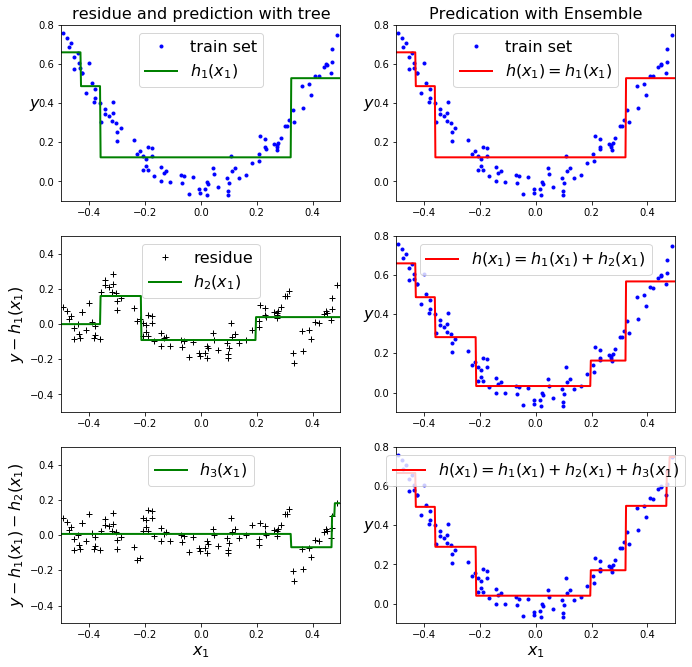

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residue and prediction with tree", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Predication with Ensemble", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="residue")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

# save_fig("gradient_boosting_plot")
plt.show()

#### 🎈 Example

In [ ]:
# sklearn 예시
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

### 📔CatBoost


- Catboost는 Category와 Boosting을 합쳐서 만들어진 이름이다. 
- Deep Learning과 달리 적은 데이터로도 좋은 결과를 얻을 수 있는 효율적인 방법이다.
- Catboost에서는 categorical 변수를 사용자가 다른 작업을 하지 않아도 자동으로 이를 변환하여 사용한다. model fitting할 때 지정해야됨!!!
- default parameters값으로 더 나은 성능 -> CatBoost를 쓰는 이유
- hyper-parmeter tuning을 하지 않더라도 기본적인 세팅으로도 좋은 결과를 얻을 수 있어 활용성이 뛰어나다. 

#### 🎈 Example

In [ ]:
# CatBoost Regressor 예시
from catboost import CatBoostRegressor
train_data = pd.read_csv('train_data.csv', encdoing='euc-kr')
test_data = pd.read_csv('test_data.csv', encdoing='euc-kr')
cat_features = [0,1,2]
train_labels = [10,20,30]

model = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)

model.fit(train_data, train_labels, cat_features) # cat_features의 index를 꼭 지정해줘야한다.

In [ ]:
# CatBoost Classifier 예시
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

# With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

# With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train, cat_features= cat_features_index)
auc(clf, train, test)

### 📔 Xgboost


- [Xgboost Hyperparameter](https://xgboost.readthedocs.io/en/latest/parameter.html)
- XGBoost는 Gradient Boosting tree 알고리즘에서 유명하고 효율적인 오픈 소스 구현
- Gradient boosting은 training loss만 minimize하는 데 XGboost는 training loss 뿐만 아니라 Tree의 complexity에 regularization function을 써서 복잡성도 줄여주는 방법으로 boosting을 하는 방법이다. 즉, complexity of tree에 penalty를 주는 것
- Null값 있어도 상관없는 모델!
- categorical variables는 모두 one-hot encoding을 통해서 바꿔줘야 함!
- `tree_method = 'gpu_hist'` hyperparameter에 이거 넣으면 계산속도 빨라짐!!!
-  `n_jobs`: Number of parallel threads used to run xgboost.

#### 🎈 Example

In [ ]:
## Xgboost Classifier
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average='weighted')

In [ ]:
## Xgboost Plot importance
# 코드1
from xgboost import plot_importance

model = xgb.XGBClassifier()
model.fit(X, y)
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model.feature_importances_[index]])

# 코드2
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(train, label)

sorted_idx = np.argsort(model.feature_importances_)[::-1]

for index in sorted_idx:
    print([train.columns[index], model.feature_importances_[index]]) 

    plot_importance(model, max_num_features = 15)
pyplot.show()

### 📔 LightGBM


- Tree based learning 알고리즘의 gradient boosting framework!
- 작은 데이터셋 규모로 진행했을 때 overfitting될 가능성이 매우 높기 때문에 10,000 row 이상인 데이터셋에 적합하다.
- 일반적인 GBM 패키지와 다르게 LGBM은 leaf wise방식을 사용한다. 
- 기존의 트리기반 알고리즘은 트리의 깊이를 줄이기 위해 level wise(균형 트리 분할)를 사용한다면 LGBM은 leaf wise(리프 중심 트리 분할)를 이용한다. 앞의 level wise는 트리를 균형적으로 분할하는데 균형작업이 추가로 들어간다고 보면 된다. 
- LGBM은 균형적으로 트리를 분할하지 않는 대신 최대 손실값(max delta loss)을 갖는 트리 노드를 계속 분할한다. 이 때문에 비대칭적으로 어느 트리는 깊이가 아주 깊어지게 된다. 이 방식은 균형 트리 분할보다 오류를 최소화할 수 있다.
- The level-wise strategy maintains a balanced tree, whereas the leaf-wise strategy splits the leaf that reduces the loss the most.
![](https://user-images.githubusercontent.com/46089347/67144522-3479aa80-f2b2-11e9-9a17-1206005286f6.png)

> 주요 hyper parameter
- n_estimators : default=100, 반복하려는 트리의 갯수
- learning_rate : 0~1사이 값 지정. gradient descent에서 얼마나 움직일 것인지 설정한다. 간단히 학습률이라고 생각하면 된다.
- max_depth : default=-1, 최대 깊이를 조절
- min_child_samples : default=20, leaf node로 분류되기 위한 최소 데이터 수
- num_leaves : default=31, one tree가 가잘 수 있는 leaf 갯수
- boost : default=gbdt, gbdt는 gradient descent를 의미
- reg_lambda : L2 규제 적용
- leg_alpha : L1 규제


#### 🎈 Example

In [ ]:
# lgbm 빠르게 써보기
import lightgbm as lgb

lg = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9234, learning_rate=0.1, max_depth=-1,
        metric='None', min_child_samples=399, min_child_weight=0.1,
        min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=13,
        objective=None, random_state=314, reg_alpha=2, reg_lambda=5,
        silent=True, subsample=0.855, subsample_for_bin=200000,
        subsample_freq=1)

In [ ]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

#With Catgeorical Features
cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT"]
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, train, test)

#### 🎈 Example (Kaggle)
- (Kaggle: Card fraud detection)

Google Drive 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd /content/gdrive/My \Drive/

In [ ]:
# 사용자에 맞게 바꾸기
# cd Colab \Notebooks/

Google Colab 사용 시 설치법

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

In [ ]:
%cd LightGBM/

In [ ]:
!mkdir build

In [ ]:
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)

In [ ]:
!sudo apt-get -y install python-pip

In [ ]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

In [ ]:
%cd python-package/

In [ ]:
!sudo python setup.py install --precompile

In [ ]:
# lgbm 설치시 pandas에서 오류가 나 재설정한 부분(선택적)
!pip install pandas==0.18.1

LGBM 설치된 경로로 추가 설치과정 필요

In [ ]:
cd /content/gdrive/My \Drive/

In [ ]:
# 사용자에 따른 선택적, 개별 드라이브 상황에 따라 경로 설정-> but LightGBM을 설치한 경로에 맞춰야 함
cd 경로/

In [ ]:
cd LightGBM

In [ ]:
cd python-package

In [ ]:
!sudo python setup.py install --precompile

분석을 위한 경로 재설정

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd /content/gdrive/My \Drive/

In [ ]:
# 사용자에 따른 선택적, 개별 드라이브 상황에 따라 경로 설정-> but LightGBM을 설치한 경로에 맞춰야 함
cd 경로

기본 패키지 및 설정, 데이터 적재

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('final_train_merged.csv')    # 맞는 데이터 적재하기
test = pd.read_csv('final_test_merged.csv')    # 맞는 데이터 적재하기

In [ ]:
# test에 고객 아이디가 없어서 아이디 있는 파일 중 아무거나 가져옴. 
# test용 고객 아이디 있는 데이터면 수정해도 무방
tt = pd.read_csv('pca_test_all_c_fraud.csv')

In [ ]:
del train['addr1_na']
del test['addr1_na']

del train['Unnamed: 0']
del test['Unnamed: 0']

In [ ]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

X_test = test.values

In [ ]:
print(X.shape, y.shape)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

LGBM 모델 사용

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.metrics import roc_auc_score

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'metric_freq': 1,
    'is_training_metric': True,
    'max_bin': 255,
    'learning_rate': 0.01,
    'num_leaves': 63,
    'tree_learner': 'serial',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'min_sum_hessian_in_leaf': 5,
    'is_enable_sparse': True,
    'use_two_round_loading': False,
    'is_save_binary_file': False,
    'output_model': 'LightGBM_model.txt',
    'num_machines': 1,
    'local_listen_port': 12400,
    'machine_list_file': 'mlist.txt',
    'verbose': 0,
    'subsample_for_bin': 200000,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [ ]:
model = lgb.train(params, lgb_train, 2500, lgb_eval, verbose_eval=10,  early_stopping_rounds=100)

In [ ]:
y_valid_pred = model.predict(X_valid)
roc_auc_score(y_valid, y_valid_pred)

In [ ]:
prediction = model.predict(X_test)

제출용 csv 만들기

In [ ]:
tt['isFraud'] = prediction

In [ ]:
tt2 = tt[['TransactionID', 'isFraud']]

In [ ]:
tt2.to_csv('lgbm_git_.csv', index=False)

#### 🎈 Hyperparameter Tuning

- 사실 대부분 boosting 모델들이 parameter tuning을 하는 이유는 tree의 다형성과 overfitting 문제를 해결하기 위함이다.
- Catboost 는 기본 파라미터가 기본적으로 최적화가 잘 되어있어서 parameter tuning에 크게 신경쓰지 않아도 됨
- 반면 Xgboost나 LightGBM은 parameter tuning에 매우 민감하다.
- Catboost 는 이를 내부적인 알고리즘으로 해결하고 있어서 parameter tuning을 할 필요가 없는 것이다. 굳이 한다면 learning_rate, random_strength, L2_regulariser 과 같은 parameter tuning인데, 결과는 큰 차이가 없다고 한다.




- [참고 사이트](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
 <br>
> 주요 hyper parameter
- n_estimators
  - default=100, 반복하려는 트리의 갯수
- learning_rate
  - 0~1사이 값 지정. gradient descent에서 얼마나 움직일 것인지 설정한다. 간단히 학습률이라고 생각하면 된다.
- min_child_samples 
  - default=20, leaf node로 분류되기 위한 최소 데이터 수
- min_child_weight[default=1]
 - Overfitting을 컨트롤하는 파라미터로, 값이 높아지면, underfitting되는 경우가 있어 CV를 통해 튜닝되어야 함.
- num_leaves
  - default=31, one tree가 가잘 수 있는 leaf 갯수
- boost
  - default=gbdt, gbdt는 gradient descent를 의미
- reg_lambda
  - L2 규제 적용
- leg_alpha
  - L1 규제
- max_depth[default=6]
 - 트리의 최대 깊이를 정의하는 parameter(DT에서 배웠음)
- gamma[default=0]
 - 노드가 split되게 위한 loss function의 값이 감소하는 최소 값을 정의함. 값이 높아질수록 알고리즘은 보수적으로 변하고, loss function의 정의에 따라 적정값이 달라져 **반드시 튜닝되어야 한다**
- subsample
 - 각 트리마다의 관측 데이터 샘플링 비율. 값을 적게 주면 over-fitting을 방지하지만 값을 너무 작게 주면 under-fitting(일반적으로 0.5~1).
- colsample_bytree
 - 각 트리마다의 feature 샘플링 비율.
- verbose
 - 0: 아무것도 안 함 (default)
 - 1: progress bar를 보여줌
 - 2: epoch마다 진행사항이 나옴

In [ ]:
## best parameter 찾는 예시 (밑에 GridsearchCV에도 같은 코드가 있음)
# 우선 부차적인 parameter 찾아주고
cb = CatBoostClassifier(
 learning_rate =0.1,
 iterations=100 #n-estimator대신 iteration을 사용,
)

cb_params_1 = {
    'depth' : [3,5,7],
    'random_strength' : [1,3],
    'bagging_temperature' : [0,0.5,1],
    'l2_leaf_reg' : [1,3,5,7],
}
cb_grid_1 = GridSearchCV(cb, param_grid=cb_params_1, scoring=my_scorer, cv=5, verbose=1)
cb_grid_1.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_1.best_score_))
print("Best Params : {}".format(cb_grid_1.best_params_))
best_cb_model = cb_grid_1.best_estimator_

# 최적의 core parameter 찾기
cb_params_2 = {
    'learning_rate' : [0.03, 0.07, 0.1],
    'iterations' : [n for n in range(80,130,20)]
}
cb_grid_2 = GridSearchCV(best_cb_model, param_grid=cb_params_2, scoring=my_scorer, cv=5, verbose=1)
cb_grid_2.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_2.best_score_))
print("Best Params : {}".format(cb_grid_2.best_params_))
best_cb_model = cb_grid_2.best_estimator_

## 🔎 4. Pasting

- 중복을 허용하지 않고 샘플링하는 앙상블 방식

#### 🎈 Example

In [ ]:
# Pasting 예시
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## 🔎 5. Stacking

- '앙상블에 속한 모든 모델의 예측을 취합하는 [함수] 대신 [모델]을 훈련시킬 수 없을까?'
- 위 아이디어에서 나온 Ensemble 방식이다.
![](https://i.pinimg.com/originals/ed/d8/87/edd8873400deea9625ee67b37377d077.jpg)
- Stacking은 sklearn에서 지원하지 않고, LightGBM, Xgboost가 진리임